# Определение перспективного тарифа для телеком компании

### Описание проекта:
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
### Описание тарифов:
##### Тариф «Смарт»
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей


##### Тариф «Ультра»
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей


«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### Описание данных

##### Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана


##### Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок


##### Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение


##### Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя


##### Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


### План работы
1. Загрузка данных и изучение общей информации


2. Подготовка данных
    - Приведение данных к нужным типам
    - Исправление ошибок в данных
    - Соединение таблиц с расчетом количества звонков, израсходованных минут , отправленных сообщений, oбъем израсходованного интернет-трафика по месяцам
    - Расчет помесячной выручки для каждого пользователя
    
    
3. Анализ данных
    - Описание поведения клиентов оператора, исходя из выборки:
        - Сколько минут разговора: сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
        - Расчет среднего количества, дисперсии и стандартного отклонения
        - Построение гистограммм и описание распределений
        
        
4. Проверка гипотез:
    - Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается
    - Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов


5. Общий вывод

## 1. Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
class color:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    END = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [3]:
calls = '/datasets/calls.csv'
internet = '/datasets/internet.csv'
messages = '/datasets/messages.csv'
tariffs = '/datasets/tariffs.csv'
users = '/datasets/users.csv'

calls = pd.read_csv(calls, sep=',') 
internet = pd.read_csv(internet, sep=',') 
messages = pd.read_csv(messages, sep=',') 
tariffs = pd.read_csv(tariffs, sep=',') 
users = pd.read_csv(users, sep=',') 

df_dict= {'calls': calls, 'internet': internet, 'messages': messages, 'users': users}

In [4]:
for i in df_dict.values():
    display(i.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [5]:
internet.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Перед нами 5 датасетов с логами по использованию мобильной связи и информацией о пользователях. Изучим подробнее информацию о них:

In [7]:
for i in df_dict:
    print(f'{color.BOLD}Общая информация по датафрейму {i}:{color.END}')
    print(df_dict[i].info())
    print()
    length = df_dict[i]['user_id'].nunique()
    print(f'{color.BOLD}Количество уникальных user_id в {i}:{color.END} {length}')
    print()
    print(f'{color.BOLD}Количество пропусков в {i}:{color.END}')
    print(df_dict[i].isna().sum())
    print()
    dub = df_dict[i].duplicated().sum()
    print(f'{color.BOLD}Количество дубликатов в {i}:{color.END} {dub}')
    print()

Общая информация по датафрейму calls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

Количество уникальных user_id в calls: 492

Количество пропусков в calls:
id           0
call_date    0
duration     0
user_id      0
dtype: int64

Количество дубликатов в calls: 0

Общая информация по датафрейму internet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB
None

Количество уникальных user_id в internet: 497

Количество пропусков в internet:
id 

Пропуски там где и должны быть и в датафреймах нет ниодного дубликата, различаются только количество уникальных пользователей от таблицы к таблице. Посмотрим, что внутри столбцов с численными типами данных:

In [8]:
def description(df):
        return df.drop(['user_id'], axis=1).select_dtypes(['int','float']).describe().round(1)
    
display(description(internet).join(description(calls)).join(description(users)))

,mb_used,duration,age
count,149396.0,202607.0,500.0
mean,370.2,6.8,46.6
std,278.3,5.8,16.7
min,0.0,0.0,18.0
25%,138.2,1.3,32.0
50%,348.0,6.0,46.0
75%,559.6,10.7,62.0
max,1724.8,38.0,75.0


Обнаружены нулевые значения в duration и mb_used, исследуем детальнее столбцы:

In [9]:
def research(df, col, bins=None, color=None):
    df[col].hist(bins=bins, density=True, color=color)
    plt.title((f'Гистограмма распределения значений для столбца {col}'))
    plt.xlabel('values')
    plt.ylabel('density')

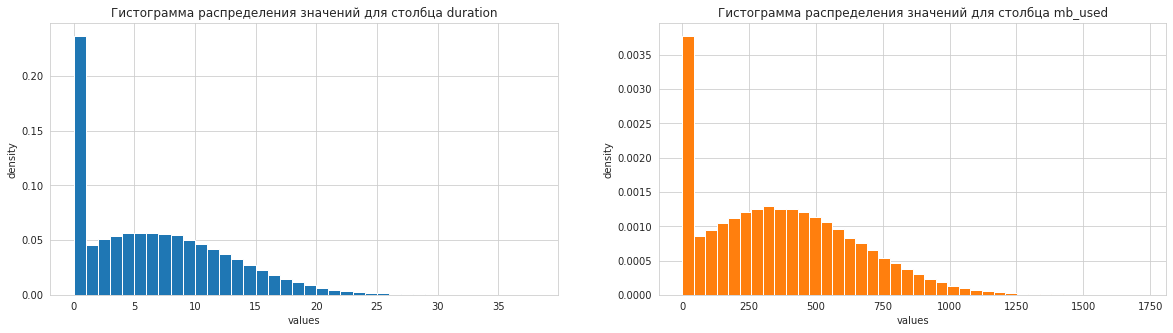

In [10]:
plt.subplots(figsize=(20, 5))
plt.subplot(1,2,1)
research(calls, 'duration', 38)
plt.subplot(1,2,2)
research(internet, 'mb_used', 40, 'C1')
plt.show()

In [11]:
def counts_ratio(df, col):
    return (df[col].value_counts().to_frame('count')
            .join(df[col].value_counts(normalize=True).to_frame('ratio')))

In [12]:
counts_ratio(calls, 'duration').head()

,count,ratio
0.00,39613,0.195516
4.49,142,0.000701
5.50,142,0.000701
6.15,141,0.000696
6.38,141,0.000696


In [13]:
counts_ratio(internet, 'mb_used').head()

,count,ratio
0.00,19598,0.131182
197.56,9,0.000060
447.30,9,0.000060
335.91,9,0.000060
108.95,8,0.000054


Почти 20% всех значений длительности звонокв - нули, очевидно, с вероятностью 20% мы будем встречать 0 в датасете, это каждое 5е значение.  13% всех значений в использования трафика - также нулевые. Даже если представить, что нули соответствуют значению в интервале от 0 до 1, то их частота была бы намного ближе к 1. 

### Вывод

Были изучены датасеты с логами о звонках, интернет-траффике, сообщениях, пользователях и тарифах - в них отсуствуют пропуски и дубликаты. Обнаружено аномальное количество нулевых значений в calls.duration и internet.mb_used, вероятно данные обнулились в результате технического сбоя.

## 2. Подготовим данные для анализа

Заменим нулевые значения данными нормального распределения в двух столбцах:

In [14]:
def replace_zero(df, col):
    a = df[col].values
    m = a == 0
    mu, sigma = df[col].mean(), df[col].std()
    a[m] = np.random.normal(mu, sigma, size=m.sum())
    df[col] = np.ceil(df[col].abs())

replace_zero(calls, 'duration')
replace_zero(internet, 'mb_used') 

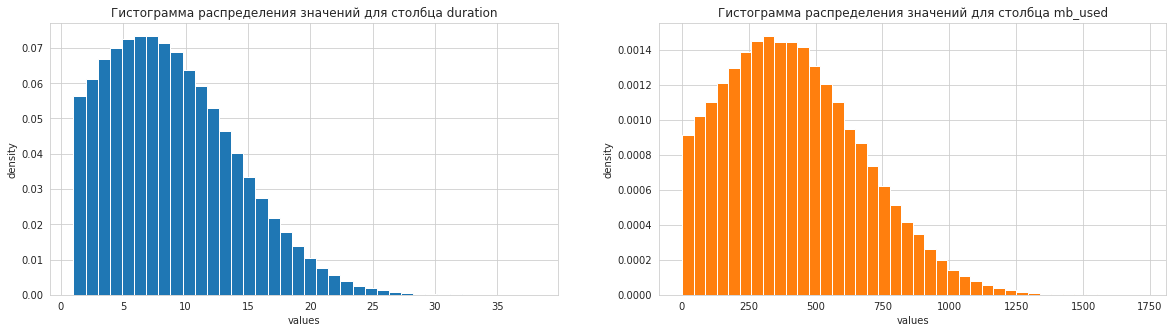

In [15]:
plt.subplots(figsize=(20, 5))
plt.subplot(1,2,1)
research(calls, 'duration', 38)
plt.subplot(1,2,2)
research(internet, 'mb_used', 40, 'C1')
plt.show()

Теперь распределение значений соотвествует пуассоновскому распределению. 

Приведем данные в duration и mb_used к целочисленному типу, а столбцы, содержащие дату к формату datetime и добавим столбец с месяцами:

In [16]:
calls['duration'] = calls['duration'].astype(int)
internet['mb_used'] = internet['mb_used'].astype(int)

In [17]:
datetime_dict= {'call_date': calls, 'session_date': internet, 'message_date': messages, 'reg_date': users}
for i in datetime_dict:
        datetime_dict[i][i] = pd.to_datetime(datetime_dict[i][i], format='%Y-%m-%dT%H:%M:%S', yearfirst=True)
        if i == 'reg_date':
            continue
        datetime_dict[i]['month'] = datetime_dict[i][i].dt.month

Все значения string в датафрейме users приведем к нижнему регистру, чтобы к ним было проще обращаться, а также, чтобы избавиться от потенциально дублирования из-за разного регистра. 

In [18]:
for i in users.columns:
    try:
        users[i] = users[i].str.lower()
    except:
        pass

Соединим датасеты в одну сводную таблицу, где будет:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячная выручка с каждого пользователя (для этого вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана и прибавим абонентскую плату, соответствующую тарифному плану).

In [19]:
users_cut = users[['user_id', 'tariff', 'city']]
calls = calls.merge(users_cut, on='user_id').reset_index(drop=True)
messages = messages.merge(users_cut, on='user_id').reset_index(drop=True)
internet = internet.merge(users_cut, on='user_id').reset_index(drop=True)

In [20]:
calls_pivot = calls.pivot_table(index=['tariff', 'city', 'user_id', 'month'], 
                                values='duration', aggfunc=({'count', 'sum'}))
internet_pivot = internet.pivot_table(index=['tariff', 'city', 'user_id', 'month'], 
                                      values='mb_used', aggfunc=({'sum'}))
messages_pivot = messages.pivot_table(index=[ 'tariff', 'city', 'user_id', 'month',], 
                                      values='id', aggfunc='count')

In [21]:
df = (calls_pivot.merge(internet_pivot, on=['tariff', 'city', 'user_id', 'month'])
      .merge(messages_pivot, on=['tariff', 'city', 'user_id', 'month']))
df.columns = ['numberof_calls', 'calls_duration', 'gb_used', 'messages_sent']
df['gb_used'] = df['gb_used'] / 1024

In [22]:
df.head(15)

numberof_calls  calls_duration    gb_used  \
tariff city        user_id month                                              
smart  архангельск 1135    1                   9              90   2.104492   
                           2                  66             563  21.538086   
                           3                  62             580  16.078125   
                           4                  54             462  20.868164   
                           5                  56             453  21.958008   
                           6                  73             683  21.773438   
                           7                  58             488  23.979492   
                           8                  73             769  21.604492   
                           9                  77             694  22.636719   
                           10                 44             464  23.425781   
                           11                 58             531  27.069336   
                           12                 54             445  22.711914   
       астрахань   1066    6                  24             199   4.571289   
                           7                  88             858  22.091797   
                           8                  79             739  32.494141   

                                  messages_sent  
tariff city        user_id month                 
smart  архангельск 1135    1                  1  
                           2                 24  
                           3                 15  
                           4                 13  
                           5                 17  
                           6                 25  
                           7                 22  
                           8                 21  
                           9                 14  
                           10                25  
                           11                27  
                           12                24  
       астрахань   1066    6                 14  
                           7                 48  
                           8                 46

In [23]:
df = df.reset_index()

In [24]:
smart_dict = (
    {'minutes': 500, 'cost_per_min': 3, 'net': 15, 'messages' : 50, 
     'cost_per_message': 3, 'cost_per_gb': 200, 'subscription fee' : 550}
)
ultra_dict =(
    {'minutes': 3000, 'cost_per_min': 1, 'net': 30, 'messages' : 1000, 
     'cost_per_message': 1, 'cost_per_gb': 150, 'subscription fee' : 1950}
)

In [25]:
def cost(row):
    tariff = row['tariff']
    duration = row['calls_duration']
    gb = row['gb_used']
    messages = row['messages_sent']
    
    if tariff == 'smart':
        if duration > smart_dict['minutes']:
            duration_cost = (duration - smart_dict['minutes']) * smart_dict['cost_per_min']
        else:
            duration_cost = 0
        if messages > smart_dict['messages']:
            mess_cost = (messages - smart_dict['messages']) * smart_dict['cost_per_message']
        else:
            mess_cost = 0
        if gb > smart_dict['net']:
            gb_cost = (gb - smart_dict['net']) * smart_dict['cost_per_gb']
        else:
            gb_cost = 0
            
        return duration_cost + mess_cost + gb_cost + smart_dict['subscription fee']
    
    if tariff == 'ultra':
        if duration > ultra_dict['minutes']:
            duration_cost = (duration - ultra_dict['minutes']) * ultra_dict['cost_per_min']
        else:
            duration_cost = 0
        if messages > ultra_dict['messages']:
            mess_cost = (messages - ultra_dict['messages']) * ultra_dict['cost_per_message']
        else:
            mess_cost = 0
        if gb > ultra_dict['net']:
            gb_cost = (gb - ultra_dict['net']) * ultra_dict['cost_per_gb']
        else:
            gb_cost = 0 
            
        return duration_cost + mess_cost + gb_cost + ultra_dict['subscription fee']

In [26]:
df['monthly_revenue'] = df.apply(cost, axis=1)
df['monthly_revenue'] = df['monthly_revenue'].round().astype(int)

In [27]:
df.head()

,tariff,city,user_id,month,numberof_calls,calls_duration,gb_used,messages_sent,monthly_revenue
0,smart,архангельск,1135,1,9,90,2.104492,1,550
1,smart,архангельск,1135,2,66,563,21.538086,24,2047
2,smart,архангельск,1135,3,62,580,16.078125,15,1006
3,smart,архангельск,1135,4,54,462,20.868164,13,1724
4,smart,архангельск,1135,5,56,453,21.958008,17,1942


### Вывод

В столбцах duration и mb_used были заменены нулевые значения на случайные данные, которые могли бы получиться при нормальном распределении, сами столбцы приведены к целочисленному типу. Все столбцы, содержащие дату были привдеены к типу datetime, в датасеты calls, internet, message были добавлены столбцы с месяцами - month. Из calls, internet, message была составлена сводная таблица, в которую было добавлено количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам, помесячная выручка с каждого пользователя.

## 3. Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц, посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишем распределения.

Для рассчета дисперсии и стандартного отклонения применим формулы оценки, поскольку работаем с выборкой, а не с генеральной совокупностью:

In [28]:
def var1(x):
    return np.var(x, ddof=1)
def std1(x):
    return np.sqrt(np.var(x, ddof=1))
def piv():
    df_pivot = (
        df.pivot_table
        (index=['tariff', 'month'], 
         values=['calls_duration', 'messages_sent', 'gb_used', 'monthly_revenue'], 
         aggfunc={'mean', var1, std1}).round(2)
)
    return df_pivot
    

In [29]:
piv()

calls_duration                    gb_used                 \
                       mean    std1       var1    mean   std1    var1   
tariff month                                                            
smart  1             259.52  197.83   39136.39   10.06   7.28   53.06   
       2             377.44  231.33   53513.39   14.12   6.87   47.16   
       3             479.46  234.78   55119.78   17.18   6.53   42.64   
       4             463.82  223.41   49912.46   15.96   6.29   39.53   
       5             489.79  217.89   47475.56   18.77   6.57   43.20   
       6             489.66  202.53   41020.41   18.42   6.59   43.41   
       7             493.36  215.66   46509.27   18.47   6.63   44.01   
       8             524.16  220.51   48624.49   19.59   6.24   38.91   
       9             520.28  216.54   46890.39   19.12   5.95   35.40   
       10            524.64  220.59   48660.68   19.53   6.74   45.38   
       11            539.22  215.10   46269.02   19.84   5.97   35.61   
       12            577.29  240.52   57849.78   21.01   6.54   42.73   
ultra  1             596.00  360.96  130294.00   14.14   5.04   25.41   
       2             486.21  412.14  169862.18   15.21  11.54  133.16   
       3             672.68  446.39  199263.56   17.27  11.14  124.09   
       4             601.47  322.42  103951.88   16.98   8.52   72.56   
       5             660.42  352.02  123918.46   19.28   9.62   92.63   
       6             606.33  368.44  135744.48   18.78   9.20   84.65   
       7             677.00  367.95  135385.85   20.39   9.66   93.24   
       8             641.94  375.75  141185.42   19.62  10.02  100.32   
       9             685.72  373.09  139197.91   19.66   9.15   83.66   
       10            698.43  388.21  150705.39   20.71   9.81   96.26   
       11            678.86  357.87  128071.25   19.93   9.76   95.24   
       12            776.30  391.84  153535.88   22.34   9.79   95.85   

             messages_sent                 monthly_revenue           \
                      mean   std1     var1            mean     std1   
tariff month                                                          
smart  1             20.00  15.88   252.13          873.13   731.92   
       2             27.94  20.99   440.47         1154.66   819.95   
       3             35.55  25.88   669.78         1622.86  1025.63   
       4             35.86  22.76   517.87         1402.54   877.49   
       5             39.03  25.27   638.78         1804.80  1010.54   
       6             38.51  27.13   736.22         1753.74  1057.42   
       7             38.99  26.82   719.35         1788.34  1042.79   
       8             39.04  27.66   765.32         1969.34  1116.13   
       9             39.25  26.56   705.45         1850.82  1041.17   
       10            39.15  27.17   738.12         1997.41  1163.58   
       11            39.96  26.69   712.54         1998.02  1141.87   
       12            42.29  28.90   835.18         2284.60  1407.36   
ultra  1             43.43  27.66   765.29         1950.00     0.00   
       2             37.29  25.69   660.22         2021.64   182.62   
       3             47.80  42.74  1826.67         2037.56   288.00   
       4             45.45  37.57  1411.33         1969.32    86.31   
       5             50.04  40.70  1656.72         2034.15   325.34   
       6             50.89  41.02  1682.55         2040.97   344.75   
       7             61.29  44.18  1951.47         2089.55   370.71   
       8             58.90  43.80  1918.65         2054.02   282.00   
       9             63.54  42.15  1776.79         2016.90   214.69   
       10            70.76  48.34  2337.20         2090.07   443.24   
       11            67.24  46.59  2170.37         2091.72   404.68   
       12            72.99  47.54  2260.01         2134.54   494.15   

                          
                    var1  
tariff month              
smart  1       535710.85  
       2       

In [30]:
def revenue():
    df_tariff = df.pivot_table(index='tariff', values='monthly_revenue', aggfunc=({'mean', std1}))
    df_tariff.columns = ['revenue_mean', 'revenue_std']
    return df_tariff
revenue()

,revenue_mean,revenue_std
tariff,,
smart,1887.704439,1154.544799
ultra,2065.977394,364.159567


Для тарифа 'smart' стандартное отклонение выше, что говорит о большем разбросе в данных и возможных выбросах, скорее всего это из-за того, что клиенты этого тарифного плана чаще выходят за включенные в планы бесплатные услуги и из-за этого значения расходов больше варьируются. 

Изучим распределения значений, для этого построим гистограммы:

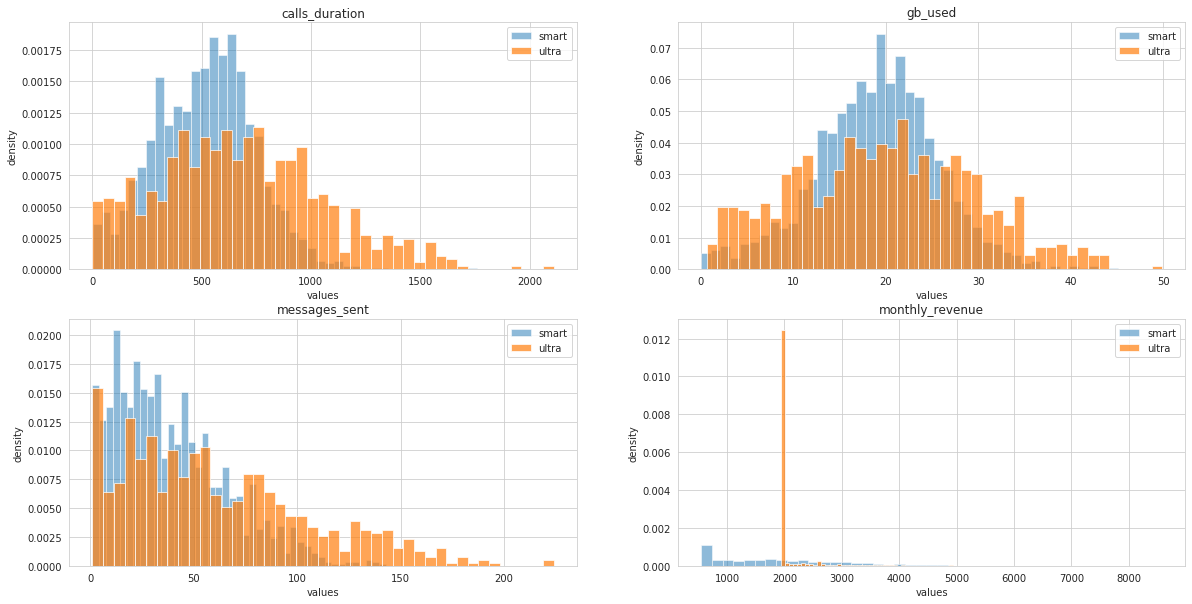

In [31]:
plt.subplots(figsize=(20, 10))
cols = ['calls_duration', 'gb_used', 'messages_sent', 'monthly_revenue']
for k,i in enumerate(cols):
    plt.subplot(2,2,k+1)
    df[df['tariff'] == 'smart'][i].hist(bins=int(np.sqrt(len(df[df['tariff'] == 'smart'][i]))), 
                                        alpha=0.5, label ='smart', density=True)
    df[df['tariff'] == 'ultra'][i].hist(bins=int(np.sqrt(len(df[df['tariff'] == 'smart'][i]))), 
                                        color='C1', alpha=0.7, label='ultra', density=True)
    plt.title(i)
    plt.legend()
    plt.xlabel('values')
    plt.ylabel('density')
plt.show()

Распределения (кроме monthly_revenue) имеют похожую форму, при этом первые два графика тарифа ultra напоминают распределние Стъюдента, то есть вероятность встретить как низкие, так и высокие значения будет выше, чем при нормальном распределении, скорее всего такой разброс в данных происходит из-за включенных бесплатных услуг. Данные тарифа smart в первых двух столбцах визуально ближе к форме нормального распределния, хоть и скошены. По распределению monthly_revenue заметно, что большая часть пользователей ultra не выходит за пределы абонентской платы, для тарифа smart больше характерен разброс значений. Исследуем столбец monthly_revenue на наличие выбросов и удалим их из таблицы:

In [32]:
def whiskerright(df, column_type):
    q3=df[column_type].quantile(0.75)
    q1=df[column_type].quantile(0.25)
    whisker = q3 + 1.5*(q3-q1)
    return whisker

def whiskerleft(df, column_type):
    q3=df[column_type].quantile(0.75)
    q1=df[column_type].quantile(0.25)
    whisker = q1 - 1.5*(q3-q1)
    return whisker

def outburst(df, column_type):
    q3outburst = len(df[df[column_type] > whiskerright(df, column_type)])
    q1outburst = len(df[df[column_type] < whiskerleft(df, column_type)])
    print('Крайнее значение "правого уса" по столбцу {}: {:.3f}'.format(column_type, whiskerright(df, column_type)))
    print('Крайнее значение "левого уса" по столбцу {}: {:.3f}'.format(column_type, whiskerleft(df, column_type)))
    print('Количество выбросов, превышающих размах "правого уса" по столбцу {}: {}'.format(column_type, q3outburst))
    print('Количество выбросов, превышающих размах "левого уса" по столбцу {}: {}'.format(column_type, q1outburst))
    print('Доля выбросов от общего числа значений по столбцу {}: {:.2%}'.format(column_type, ((q3outburst + q1outburst) / len(df[column_type]))))    
    
def bplot(df, value):
    plt.subplots(figsize=(19, 5))
    sns.boxplot(data=df[value], orient='h')
    plt.title(value)
    plt.xlabel('values')
    plt.ylabel('')
    plt.show()
    outburst(df, value)

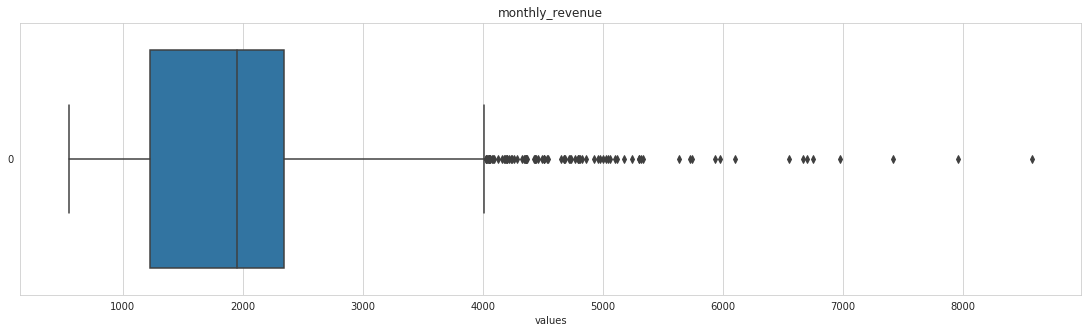

Крайнее значение "правого уса" по столбцу monthly_revenue: 4013.250
Крайнее значение "левого уса" по столбцу monthly_revenue: -440.750
Количество выбросов, превышающих размах "правого уса" по столбцу monthly_revenue: 90
Количество выбросов, превышающих размах "левого уса" по столбцу monthly_revenue: 0
Доля выбросов от общего числа значений по столбцу monthly_revenue: 3.37%


,monthly_revenue
count,2667.0
mean,1938.0
std,1000.4
min,550.0
25%,1229.5
50%,1950.0
75%,2343.0
max,8582.0


In [33]:
bplot(df, 'monthly_revenue')
df['monthly_revenue'].describe().round(1).to_frame()

In [34]:
df = df[df['monthly_revenue'] <= whiskerright(df, 'monthly_revenue')]
df = df.reset_index(drop=True)

In [35]:
revenue()

,revenue_mean,revenue_std
tariff,,
smart,1744.723591,955.049267
ultra,2059.496000,341.534641


Изучим поведение пользователей:

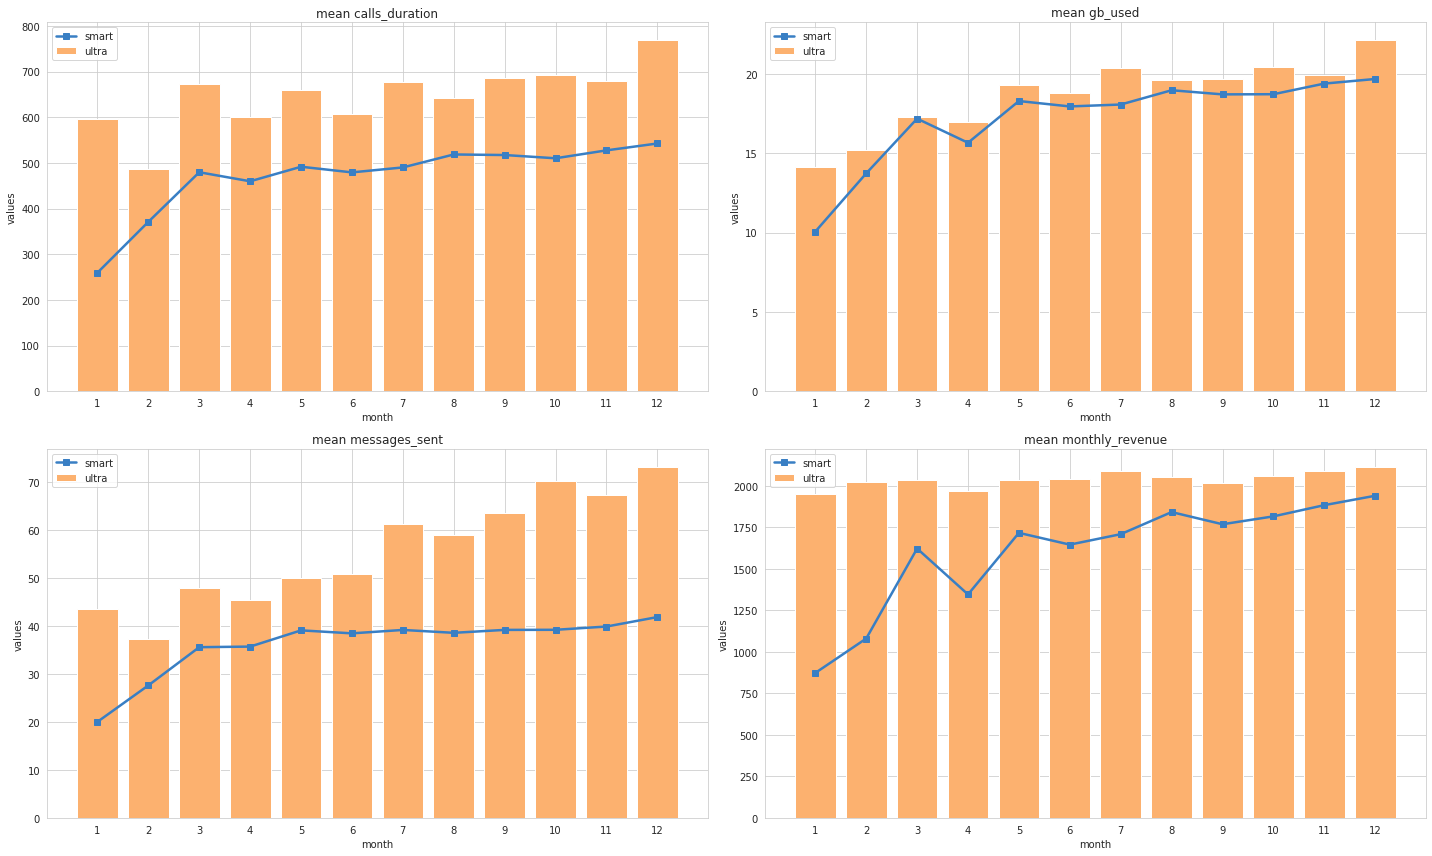

In [36]:
struct = piv().reset_index()
plt.subplots(figsize=(20, 12))
for k,i in enumerate(cols):
    plt.subplot(2,2,k+1)
#     sns.barplot(data=struct, hue='tariff', x='month',  y=(i, 'mean'))
    month = list(struct[struct['tariff'] == "ultra"]['month'])
    ultra_data = list(struct[struct['tariff'] == "ultra"][i, 'mean'])
    plt.bar(month,ultra_data, color='#fcb16f', label='ultra')
    smart_data = list(struct[struct['tariff'] == "smart"][i, 'mean'])
    plt.plot(month,smart_data, label='smart', linewidth=2.5, marker='s', color='#397fc4')
    plt.xticks(range(1,13))
    plt.title(f'mean {i}')
    plt.legend()
    plt.xlabel('month')
    plt.ylabel('values')
    plt.tight_layout()
plt.show()

Исходя из полученных данных можно сказать, что клиенты с тарифным планом ultra чаще разговаривают и отправляют смс и немного больше проводят времени в интернете, можно заметить, клиенты обоих тарифных планов чаще всего пользуются услугами к декабрю и реже всего в январе. Что касается ежемесячных расходов, то клиенты ultra в среднем ежемесячно выплачивают одинаковую сумму в пределах 2000 рублей, расходы клиентов smart в среднем ниже, но могут легко варьироваться из-за низких лимитов на бесплатные услуги и более дорогих минут/сообщений и мегабайт.

### Вывод

Пользователи ultra в целом больше общаются, отправляют сообщений и примерно одинаково проводят времени в интернете относительно пользователей тарифа smart. При этом клиенты ultra платят в среднем одинаково пределах 2000 рублей, в то время как ежемесячная сумма варьируется smart из-за низких лимитов, низкой абонплаты и более высокой цены за расход услуг.

## 4. Проверка гипотез

- средняя выручка тарифов «Ультра» и «Смарт» различается;
- средняя выручка по Москве отличается от выручки из других регионов;

##### Сформируем нулевую и альтернативную гипотезы:
- H(0) - в генеральной совокупности никакого различия между выборочными средними нет (M(1) = M(2)), то есть средняя выручка между тарифами smart и ultra не различается, средняя выручка по Москве и регионам не различается.
- H(1) - средние в генеральной совокупности не равны (M(1) != M(2)), - средняя выручка между тарифами различается, средняя выручка по Москве и регионам различается.

Так как будем проводить два теста на одной выборке, применеим поправку Бонферонни и установим  alpha=0.05 / 2.

In [37]:
def t_test(array1, array2):
    alpha = 0.05 / 2
    results = st.ttest_ind(array1, array2)
    print('P-value: {}'.format(results.pvalue))
    if (results.pvalue < alpha):
        print(f'P-value < {alpha}, значение генеральной совокупности не попало в доверительный интервал. Отвергаем нулевую гипотезу.')
    else:
        print(f'P-value > {alpha}, значение генеральной совокупности попало в доверительный интервал. Данные согласуются с нулевой гипотезой.') 

def interval(array1, array2):
    container = []
    x1 = sum(array1)/len(array1)
    x2 = sum(array2)/len(array2)
    std_x1 = np.std((array1), ddof=1)
    std_x2 = np.std((array2), ddof=1)
    n1 = len(array1)
    n2 = len(array2)
    se = np.sqrt((std_x1**2)/n1 + (std_x2**2)/n2)
    container.append(((x1-x2) - 1.96*se))
    container.append(((x1-x2) + 1.96*se))
    print('Значения доверительного интервала: {}'.format(list(map(lambda x: x.round(3), container))))
    print('Разница средних: {:.3f}'.format( x1-x2))    

Проверим гипотезу: средняя выручка тарифов «Ультра» и «Смарт» различается?

In [38]:
tariff_smart = df[df['tariff'] == 'smart']['monthly_revenue']
tariff_ultra = df[df['tariff'] == 'ultra']['monthly_revenue']

t_test(tariff_smart, tariff_ultra)
interval(tariff_smart, tariff_ultra)

P-value: 2.5150732806174526e-18
P-value < 0.025, значение генеральной совокупности не попало в доверительный интервал. Отвергаем нулевую гипотезу.
Значения доверительного интервала: [-364.926, -264.619]
Разница средних: -314.772


Проверим гипотезу: средняя выручка по Москве отличается от выручки из других регионов?

In [39]:
moscow = df[df['city'] == 'москва']['monthly_revenue']
other = df[df['city'] != 'москва']['monthly_revenue']

t_test(moscow, other)
interval(moscow, other)

P-value: 0.9156371769690266
P-value > 0.025, значение генеральной совокупности попало в доверительный интервал. Данные согласуются с нулевой гипотезой.
Значения доверительного интервала: [-83.33, 74.345]
Разница средних: -4.492


### Вывод

Были проверены гипотезы о том, что средняя выручка тарифов «Ультра» и «Смарт» различается (нулевую гипотезу отвергли); средняя выручка по Москве отличается от выручки из других регионов - нулевую гипотезу отвергнуть не смогли.

## 5. Общий вывод

Был проведен предварительный анализ тарифов на небольшой выборке клиентов: изучены датасеты, данные были предобработаны, а найденные в них ошибки исправлены, столбцы приведены к нужным типам; из всех датасетов удалось получить сводную таблицу, для которой был добавлен столбец помесячной выручки с каждого клиента. 

Также было изучено поведение клиентов: пользователи с тарифным планом ultra чаще разговаривают и отправляют смс и немного больше проводят времени в интернете, клиенты обоих тарифных планов чаще всего пользуются услугами к декабрю и реже всего в январе; клиенты ultra в среднем ежемесячно выплачивают одинаковую сумму в пределах 2000 рублей, расходы клиентов smart в среднем ниже, но могут варьироваться из-за низких лимитов на бесплатные услуги и более дорогих минут/сообщений и мегабайт. Таким образом, можно сделать вывод, что:
- тариф smart в среднем дешевле и подойдет клиентам, которые не хотят платить большую абонплату и которые в целом меньше времени тратят на звонки, меньше используют интернет, меньше отправляют отправляют сообщения. Укладываясь в лимиты тарифа они могут ежемесячно платить только 550 руб.
- тариф ultra дороже и его преимущество в том что в среднем пользователи не выходят далеко за пределы абонентской платы, затраты будут выше, зато они будут фиксированные, так как лимиты бесплатных услуг большие и их сложно превысить, соотвественно можно тратить больше времени на звонки, писать больше сообщений, сидеть больше в интернете.

##### Были проверены гипотезы:
- Cредняя выручка тарифов «Ультра» и «Смарт» различается - удалось отвергнуть нулевую гипотезу; 
- Средняя выручка по Москве не отличается от выручки из других регионов - нулевую гипотезу отвергнуть не удалось.